In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

2.2 Reading the csv files 

In [2]:
df = pd.read_csv("Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

2.3 Clean the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors = 'coerce')


In [5]:
df.drop(['customerID'], axis=1 ,inplace = True)

In [6]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True) #removing nulls (delete any row with null value)
#df.isnull().sum()

In [8]:
df2 = df.select_dtypes(include =['object'])
df2.drop(['Churn'] , axis = 1 , inplace = True)
df2.drop(['gender'] , axis = 1 , inplace = True)
df2.drop(['Dependents'] , axis = 1 , inplace = True)
df2.drop(['Partner'] , axis = 1 , inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PhoneService      7032 non-null   object
 1   MultipleLines     7032 non-null   object
 2   InternetService   7032 non-null   object
 3   OnlineSecurity    7032 non-null   object
 4   OnlineBackup      7032 non-null   object
 5   DeviceProtection  7032 non-null   object
 6   TechSupport       7032 non-null   object
 7   StreamingTV       7032 non-null   object
 8   StreamingMovies   7032 non-null   object
 9   Contract          7032 non-null   object
 10  PaperlessBilling  7032 non-null   object
 11  PaymentMethod     7032 non-null   object
dtypes: object(12)
memory usage: 714.2+ KB
D:\anaconda\envs\tensorflow_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [9]:
#changing all to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)


In [10]:
df.replace({'yes': 1 , 'no' : 0 ,'no phone service': 0}, inplace=True)
#condition =(df['MultipleLines'] == "no phone service")
df


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     female              0        1           0       1             0   
1       male              0        0           0      34             1   
2       male              0        0           0       2             1   
3       male              0        0           0      45             0   
4     female              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    male              0        1           1      24             1   
7039  female              0        1           1      72             1   
7040  female              0        1           1      11             0   
7041    male              1        1           0       4             1   
7042    male              0        0           0      66             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                 0             dsl              0            1   
1                 0             dsl              1            0   
2                 0             dsl              1            1   
3                 0             dsl              1            0   
4                 0     fiber optic              0            0   
...             ...             ...            ...          ...   
7038              1             dsl              1            0   
7039              1     fiber optic              0            1   
7040              0             dsl              1            0   
7041              1     fiber optic              0            0   
7042              0     fiber optic              1            0   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                   0           0           0               0  month-to-month   
1                   1           0           0               0        one year   
2                   0           0           0               0  month-to-month   
3                   1           1           0               0        one year   
4                   0           0           0               0  month-to-month   
...               ...         ...         ...             ...             ...   
7038                1           1           1               1        one year   
7039                1           0           1               1        one year   
7040                0           0           0               0  month-to-month   
7041                0           0           0               0  month-to-month   
7042                1           1           1               1        two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                    1           electronic check           29.85   
1                    0               mailed check           56.95   
2                    1               mailed check           53.85   
3                    0  bank transfer (automatic)           42.30   
4                    1           electronic check           70.70   
...                ...                        ...             ...   
7038                 1               mailed check           84.80   
7039                 1    credit card (automatic)          103.20   
7040                 1           electronic check           29.60   
7041                 1               mailed check           74.40   
7042                 1  bank transfer (automatic)          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7032 rows x 20 columns]

2.4 Data Visualisation

In [11]:
#correlation of df 
df.corr()

SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016957   -0.210550  0.015683      0.008392   
Partner                0.016957  1.000000    0.452269  0.381912      0.018397   
Dependents            -0.210550  0.452269    1.000000  0.163386     -0.001078   
tenure                 0.015683  0.381912    0.163386  1.000000      0.007877   
PhoneService           0.008392  0.018397   -0.001078  0.007877      1.000000   
MultipleLines          0.142996  0.142561   -0.024307  0.332399      0.279530   
PaperlessBilling       0.156258 -0.013957   -0.110131  0.004823      0.016696   
MonthlyCharges         0.219874  0.097825   -0.112343  0.246862      0.248033   
TotalCharges           0.102411  0.319072    0.064653  0.825880      0.113008   
Churn                  0.150541 -0.149982   -0.163128 -0.354049      0.011691   

                  MultipleLines  PaperlessBilling  MonthlyCharges  \
SeniorCitizen          0.142996          0.156258        0.219874   
Partner                0.142561         -0.013957        0.097825   
Dependents            -0.024307         -0.110131       -0.112343   
tenure                 0.332399          0.004823        0.246862   
PhoneService           0.279530          0.016696        0.248033   
MultipleLines          1.000000          0.163746        0.490912   
PaperlessBilling       0.163746          1.000000        0.351930   
MonthlyCharges         0.490912          0.351930        1.000000   
TotalCharges           0.469042          0.157830        0.651065   
Churn                  0.040033          0.191454        0.192858   

                  TotalCharges     Churn  
SeniorCitizen         0.102411  0.150541  
Partner               0.319072 -0.149982  
Dependents            0.064653 -0.163128  
tenure                0.825880 -0.354049  
PhoneService          0.113008  0.011691  
MultipleLines         0.469042  0.040033  
PaperlessBilling      0.157830  0.191454  
MonthlyCharges        0.651065  0.192858  
TotalCharges          1.000000 -0.199484  
Churn                -0.199484  1.000000

In [12]:
fig = px.imshow(df.corr())
fig.show()

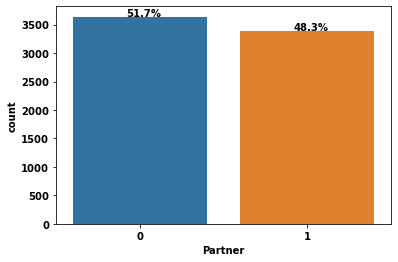

<Figure size 432x288 with 0 Axes>

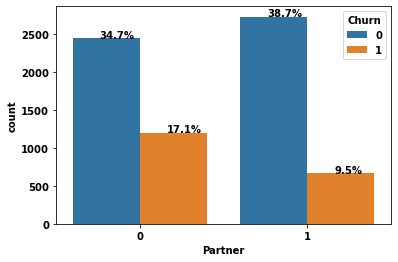

<Figure size 432x288 with 0 Axes>

In [13]:
#counts of observations in each categorical bin using bars
ax  = sns.countplot(x ='Partner', data = df)
plt.figure()

total = len(df['Partner'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()/2.5
    y= p.get_y()+ p.get_height()+1
    ax.annotate(percentage,(x,y))
plt.show()

ax = sns.countplot(x='Partner', hue='Churn' ,data=df) 
plt.figure()

total = len(df['Partner']) 
for p in ax.patches:
   percentage = '{:.1f}%'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()/2.5 
   y = p.get_y() + p.get_height()+1
   ax.annotate(percentage,(x, y))
plt.show()

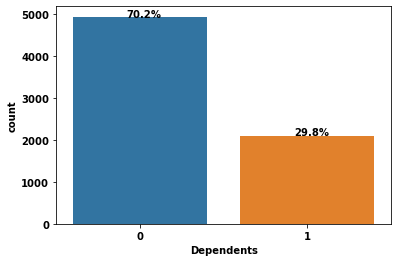

<Figure size 432x288 with 0 Axes>

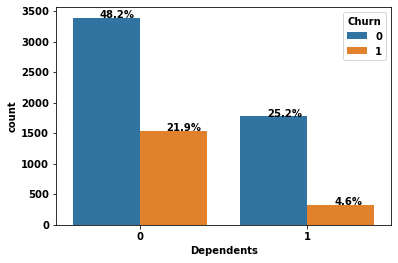

<Figure size 432x288 with 0 Axes>

In [14]:
#counts of observations in each categorical bin using bars
ax  = sns.countplot(x ='Dependents', data = df)
plt.figure()

total = len(df['Dependents'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()/2.5
    y= p.get_y()+ p.get_height()+1
    ax.annotate(percentage,(x,y))
plt.show()

ax = sns.countplot(x='Dependents', hue='Churn' ,data=df) 
plt.figure()

total = len(df['Dependents']) 
for p in ax.patches:
   percentage = '{:.1f}%'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()/2.5 
   y = p.get_y() + p.get_height()+1
   ax.annotate(percentage,(x, y))
plt.show()

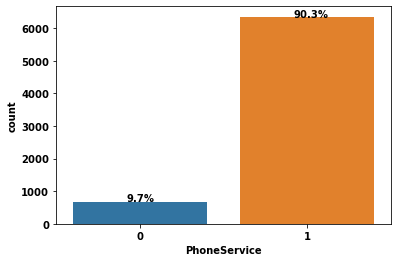

<Figure size 432x288 with 0 Axes>

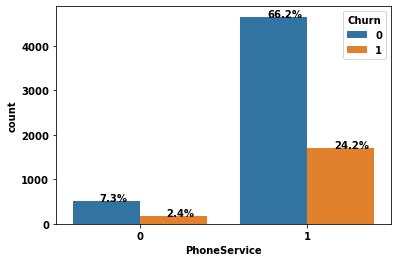

<Figure size 432x288 with 0 Axes>

In [15]:
#counts of observations in each categorical bin using bars
ax  = sns.countplot(x ='PhoneService', data = df)
plt.figure()

total = len(df['PhoneService'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()/2.5
    y= p.get_y()+ p.get_height()+1
    ax.annotate(percentage,(x,y))
plt.show()

ax = sns.countplot(x='PhoneService', hue='Churn' ,data=df) 
plt.figure()

total = len(df['PhoneService']) 
for p in ax.patches:
   percentage = '{:.1f}%'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()/2.5 
   y = p.get_y() + p.get_height()+1
   ax.annotate(percentage,(x, y))
plt.show()

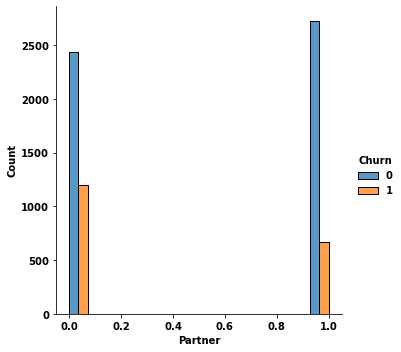

In [16]:
sns.displot(df, x='Partner', hue='Churn', multiple="dodge")


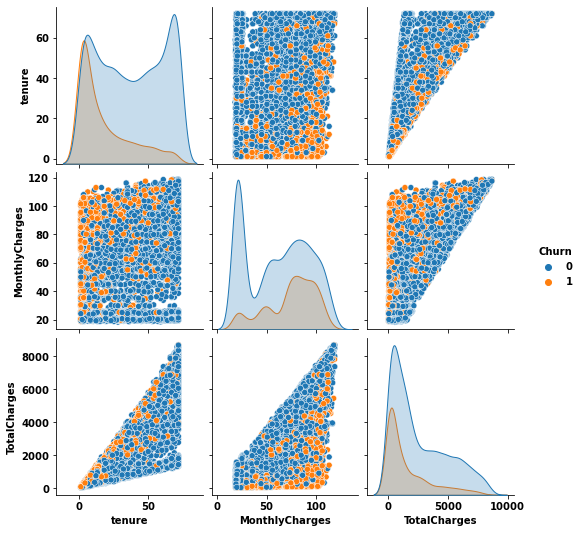

In [17]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue='Churn')

2.5 Preparing data for Logistic Regression

In [18]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  female              0        1           0       1             0   
1    male              0        0           0      34             1   
2    male              0        0           0       2             1   
3    male              0        0           0      45             0   
4  female              0        0           0       2             1   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0              0             dsl              0            1                0   
1              0             dsl              1            0                1   
2              0             dsl              1            1                0   
3              0             dsl              1            0                1   
4              0     fiber optic              0            0                0   

  TechSupport StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0           0           0               0  month-to-month                 1   
1           0           0               0        one year                 0   
2           0           0               0  month-to-month                 1   
3           1           0               0        one year                 0   
4           0           0               0  month-to-month                 1   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0           electronic check           29.85         29.85      0  
1               mailed check           56.95       1889.50      0  
2               mailed check           53.85        108.15      1  
3  bank transfer (automatic)           42.30       1840.75      0  
4           electronic check           70.70        151.65      1

In [19]:
df.drop(['gender'], axis=1 ,inplace = True)
df.drop(['Partner'], axis=1 ,inplace = True) 
df.drop(['Dependents'], axis=1 ,inplace = True) 

In [20]:
dummy = pd.get_dummies(df2)
dummy.head()

PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   
3                1                 0                 0   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  ...  StreamingMovies_Yes  \
0                                   0  ...                    0   
1                                   0  ...                    0   
2                                   0  ...                    0   
3                                   0  ...                    0   
4                                   0  ...                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 35 columns]

2.6 Generating train and test data

In [27]:
X = np.array(dummy)
y = np.array(df['Churn'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#split the test(0.25) train(0.75)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

2.7 Predict future churn 

In [29]:
y_pred=logistic_regression.predict(X_test)

2.8 Evaluate your model 

Accuracy:  0.781651376146789


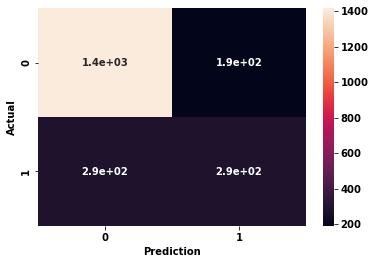

In [24]:
#confusion matrix and accuracy 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Prediction'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

In [25]:
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1605
           1       0.60      0.50      0.55       575

    accuracy                           0.78      2180
   macro avg       0.72      0.69      0.70      2180
weighted avg       0.77      0.78      0.77      2180



In [26]:
roc_auc_score(y_test,y_pred)

0.692114316673439